In [11]:
pip install tweet-preprocessor


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
#load Data
import numpy as np 
import pandas as pd
import preprocessor as p
import matplotlib.pyplot as plt
import seaborn as sns
import re, string, unicodedata
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from tensorflow import keras
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [13]:
tweets = pd.read_csv('tweets.csv',encoding='utf8')
tweets



,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Perbandingan Data Setiap Kelas')

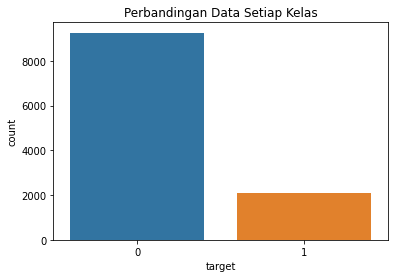

In [14]:
sns.countplot('target', data=tweets)
plt.title('Perbandingan Data Setiap Kelas')

In [15]:
tweets['target'].value_counts()

0    9256
1    2114
Name: target, dtype: int64

In [16]:
#preprocessing
# tweet preprocessor menghilangkan URL, mention, reserved word (RT,FAV), emoji, dan smileys
def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

tweets['textprep'] = tweets.apply(preprocess_tweet, axis=1)

In [17]:
tweets

,id,keyword,location,text,target,textprep
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,"Communal violence in Bhainsa, Telangana. ""Ston..."
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,Telangana: Section has been imposed in Bhainsa...
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze at dealership
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze at dealership
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,"""Lord Jesus, your love brings freedom and pard..."
...,...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0,Media should have warned us well in advance. T...
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin &a...
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin &a...
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,"ok who remember ""outcast"" nd the ""dora"" au?? T..."


In [18]:
def preprocess_data(data):
 #menghapus angka
 data = data.astype(str).str.replace('\d+', '', regex=True)
 #menjadikan lowercase
 lower_text = data.str.lower()
 #lemmatize
 lemmatizer = nltk.stem.WordNetLemmatizer()
 #tokenize
 w_tokenizer =  TweetTokenizer()

 def lemmatize_text(text):
  return [(lemmatizer.lemmatize(w)) for w \
                       in w_tokenizer.tokenize((text))]
 def remove_punctuation(words):
  new_words = []
  for word in words:
      new_word = re.sub(r'[^\w\s]', '', (word))
      if new_word != '':
         new_words.append(new_word)
  return new_words

 words = lower_text.apply(lemmatize_text)
 words = words.apply(remove_punctuation)
 return pd.DataFrame(words)

prep_tweets = preprocess_data(tweets['textprep'])
tweets['textprep2'] = prep_tweets

In [19]:
tweets

,id,keyword,location,text,target,textprep,textprep2
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,"Communal violence in Bhainsa, Telangana. ""Ston...","[communal, violence, in, bhainsa, telangana, s..."
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,Telangana: Section has been imposed in Bhainsa...,"[telangana, section, ha, been, imposed, in, bh..."
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze at dealership,"[arsonist, set, car, ablaze, at, dealership]"
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze at dealership,"[arsonist, set, car, ablaze, at, dealership]"
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,"""Lord Jesus, your love brings freedom and pard...","[lord, jesus, your, love, brings, freedom, and..."
...,...,...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0,Media should have warned us well in advance. T...,"[medium, should, have, warned, u, well, in, ad..."
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin &a...,"[i, feel, directly, attacked, i, consider, moo..."
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin &a...,"[i, feel, directly, attacked, i, consider, moo..."
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,"ok who remember ""outcast"" nd the ""dora"" au?? T...","[ok, who, remember, outcast, nd, the, dora, au..."


In [20]:
stop_words = set(stopwords.words('english'))
tweets['textprep2'] = tweets['textprep2'].apply(lambda x: [item for item in \
                                    x if item not in stop_words])

In [21]:
tweets

,id,keyword,location,text,target,textprep,textprep2
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,"Communal violence in Bhainsa, Telangana. ""Ston...","[communal, violence, bhainsa, telangana, stone..."
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,Telangana: Section has been imposed in Bhainsa...,"[telangana, section, ha, imposed, bhainsa, jan..."
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze at dealership,"[arsonist, set, car, ablaze, dealership]"
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze at dealership,"[arsonist, set, car, ablaze, dealership]"
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,"""Lord Jesus, your love brings freedom and pard...","[lord, jesus, love, brings, freedom, pardon, f..."
...,...,...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0,Media should have warned us well in advance. T...,"[medium, warned, u, well, advance, wrecked, wh..."
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin &a...,"[feel, directly, attacked, consider, moonbin, ..."
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin &a...,"[feel, directly, attacked, consider, moonbin, ..."
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,"ok who remember ""outcast"" nd the ""dora"" au?? T...","[ok, remember, outcast, nd, dora, au, au, wrec..."


In [22]:
#join tokenize data
tweets['textprep_join'] = tweets['textprep2'].apply(lambda x: ' '.join(x))
tweets

,id,keyword,location,text,target,textprep,textprep2,textprep_join
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,"Communal violence in Bhainsa, Telangana. ""Ston...","[communal, violence, bhainsa, telangana, stone...",communal violence bhainsa telangana stone pelt...
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,Telangana: Section has been imposed in Bhainsa...,"[telangana, section, ha, imposed, bhainsa, jan...",telangana section ha imposed bhainsa january c...
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze at dealership,"[arsonist, set, car, ablaze, dealership]",arsonist set car ablaze dealership
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze at dealership,"[arsonist, set, car, ablaze, dealership]",arsonist set car ablaze dealership
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,"""Lord Jesus, your love brings freedom and pard...","[lord, jesus, love, brings, freedom, pardon, f...",lord jesus love brings freedom pardon fill hol...
...,...,...,...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0,Media should have warned us well in advance. T...,"[medium, warned, u, well, advance, wrecked, wh...",medium warned u well advance wrecked whole nig...
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin &a...,"[feel, directly, attacked, consider, moonbin, ...",feel directly attacked consider moonbin jinjin...
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin &a...,"[feel, directly, attacked, consider, moonbin, ...",feel directly attacked consider moonbin jinjin...
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,"ok who remember ""outcast"" nd the ""dora"" au?? T...","[ok, remember, outcast, nd, dora, au, au, wrec...",ok remember outcast nd dora au au wrecked nerv...
